In [1]:
%matplotlib inline
import random
import numpy as np
import pandas as pd
import PIL.Image
from albumentations import Compose, ShiftScaleRotate, Cutout, IAAAdditiveGaussianNoise, OpticalDistortion, GridDistortion

In [2]:
images = np.load("../input/train_128x128_crop.npy")
labels = pd.read_csv("../input/train.csv")
preds = pd.read_csv("../result/baseline_2020_01_2")

In [198]:
def crop_char_image(image, threshold=25):
    assert image.ndim == 2
    is_black = image < threshold

    is_black_vertical = np.sum(is_black, axis=0) > 0
    is_black_horizontal = np.sum(is_black, axis=1) > 0
    left = np.argmax(is_black_horizontal)
    right = np.argmax(is_black_horizontal[::-1])
    top = np.argmax(is_black_vertical)
    bottom = np.argmax(is_black_vertical[::-1])
    print(left, right, top, bottom)
    height, width = image.shape
    cropped_image = image[left-20:height - right+20, top-20:width - bottom+20]
    return cropped_image

In [124]:
aug = Compose([
    ShiftScaleRotate(rotate_limit=15, p=1),
#     IAAAdditiveGaussianNoise(p=1),
    OpticalDistortion(p=1),
    GridDistortion(p=.1),
    Cutout(max_h_size=16, max_w_size=16, p=1)
])

172326 image_id               Train_172326
grapheme_root                    96
vowel_diacritic                   7
consonant_diacritic               1
grapheme                        পেঁ
Name: 172326, dtype: object


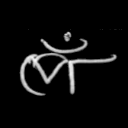

In [151]:
r = random.randint(0, len(labels)-1)
print(r, labels.iloc[r])
PIL.Image.fromarray(images[r])

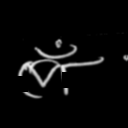

In [155]:
PIL.Image.fromarray(aug(image=images[r])["image"])

In [74]:
aug(images[r])

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()